# Install Packages

In [ ]:
install.packages("caret")
install.packages("corrr")
install.packages("dplyr")

# Read CSV

In [14]:
df <- read.csv("ObesityDataSet.csv")
head(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [20]:
sprintf("data dimension: %d %d", dim(df)[1], dim(df)[2])
sapply(df, class)

[1] "data dimension: 2111 17"

Gender                            Age 
                   "character"                      "numeric" 
                        Height                         Weight 
                     "numeric"                      "numeric" 
family_history_with_overweight                           FAVC 
                   "character"                    "character" 
                          FCVC                            NCP 
                     "numeric"                      "numeric" 
                          CAEC                          SMOKE 
                   "character"                    "character" 
                          CH2O                            SCC 
                     "numeric"                    "character" 
                           FAF                            TUE 
                     "numeric"                      "numeric" 
                          CALC                         MTRANS 
                   "character"                    "character" 
                    NObeyesdad 
                   "character"

# EDA

In [125]:
cleaned_df <- transform(df, 
                        Gender = as.factor(Gender), 
                        Age = as.integer(Age),
                        family_history_with_overweight = as.factor(family_history_with_overweight), 
                        FAVC = as.factor(FAVC), 
                        FCVC = as.integer(FCVC),
                        NCP = as.integer(NCP),
                        CAEC = as.factor(CAEC),
                        SMOKE = as.factor(SMOKE), 
                        SCC = as.factor(SCC), 
                        FAF = as.integer(FAF),
                        TUE = as.integer(TUE),
                        CALC = as.factor(CALC), 
                        MTRANS = as.factor(MTRANS), 
                        NObeyesdad = as.factor(NObeyesdad))
head(cleaned_df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<fct>,<int>,<dbl>,<dbl>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<dbl>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [155]:
sapply(cleaned_df, function(x)all(is.na(x)))

Gender                            Age 
                         FALSE                          FALSE 
                        Height                         Weight 
                         FALSE                          FALSE 
family_history_with_overweight                           FAVC 
                         FALSE                          FALSE 
                          FCVC                            NCP 
                         FALSE                          FALSE 
                          CAEC                          SMOKE 
                         FALSE                          FALSE 
                          CH2O                            SCC 
                         FALSE                          FALSE 
                           FAF                            TUE 
                         FALSE                          FALSE 
                          CALC                         MTRANS 
                         FALSE                          FALSE 
                    NObeyesdad 
                         FALSE

In [156]:
summary(cleaned_df)

    Gender          Age            Height          Weight      
 Female:1043   Min.   :14.00   Min.   :1.450   Min.   : 39.00  
 Male  :1068   1st Qu.:19.00   1st Qu.:1.630   1st Qu.: 65.47  
               Median :22.00   Median :1.700   Median : 83.00  
               Mean   :23.97   Mean   :1.702   Mean   : 86.59  
               3rd Qu.:26.00   3rd Qu.:1.768   3rd Qu.:107.43  
               Max.   :61.00   Max.   :1.980   Max.   :173.00  
                                                               
 family_history_with_overweight  FAVC           FCVC            NCP       
 no : 385                       no : 245   Min.   :1.000   Min.   :1.000  
 yes:1726                       yes:1866   1st Qu.:2.000   1st Qu.:2.000  
                                           Median :2.000   Median :3.000  
                                           Mean   :2.213   Mean   :2.523  
                                           3rd Qu.:3.000   3rd Qu.:3.000  
                                      

## Plotting

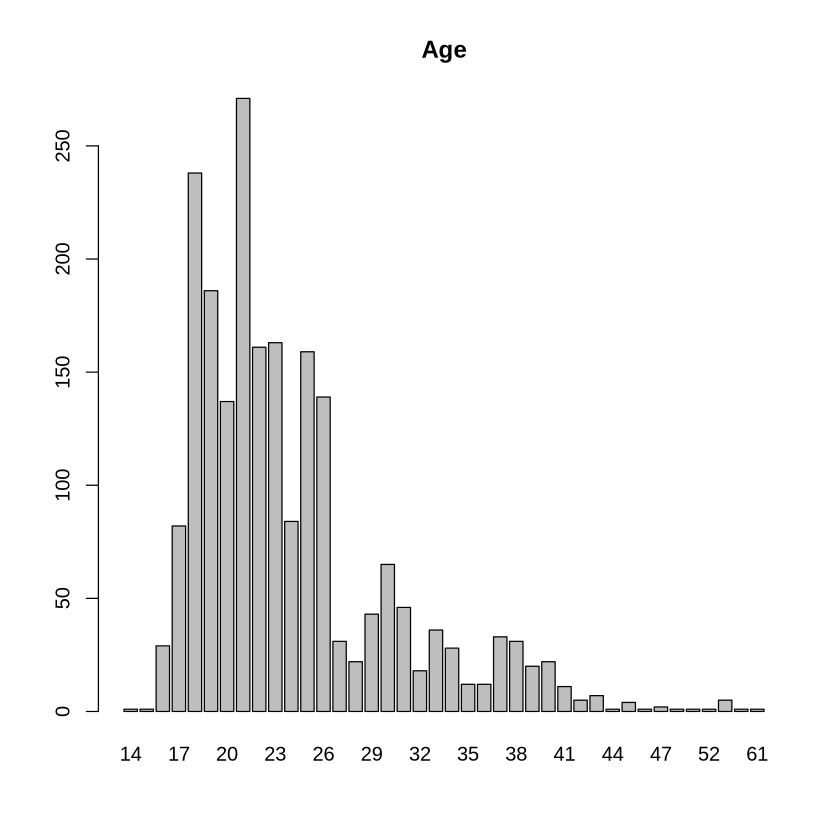

In [120]:
barplot(table(cleaned_df$Age), main="Age")

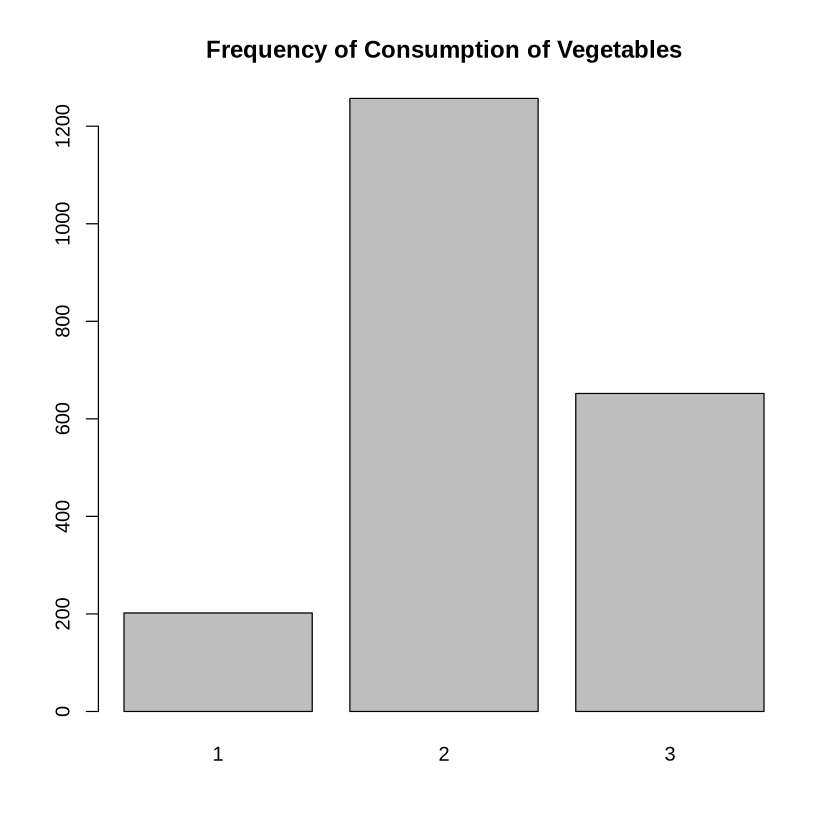

In [121]:
barplot(table(cleaned_df$FCVC), main="Frequency of Consumption of Vegetables")

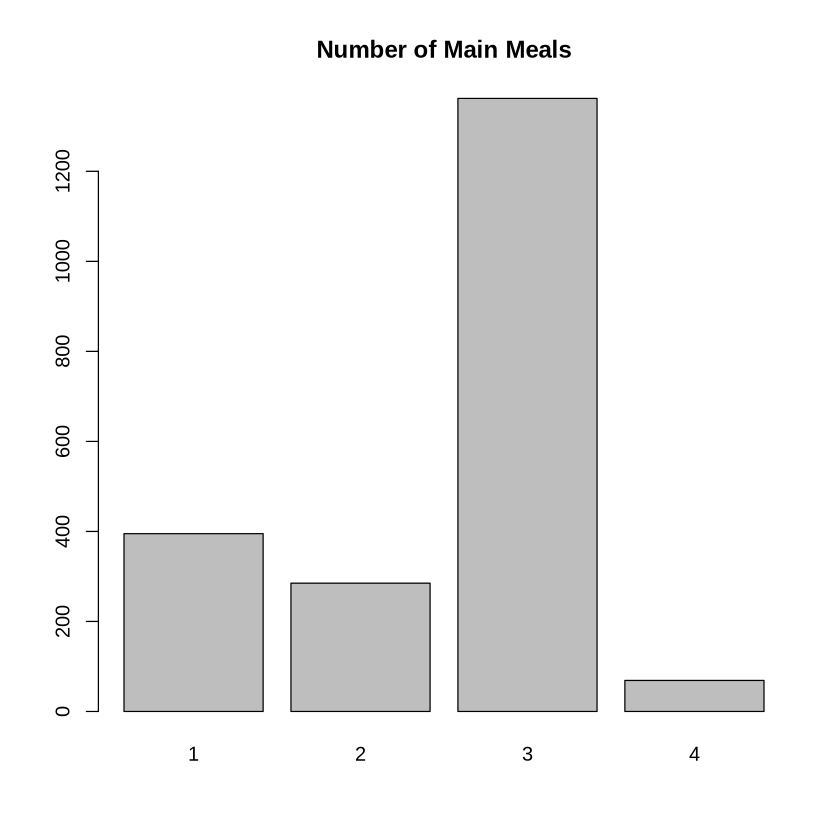

In [122]:
barplot(table(cleaned_df$NCP), main="Number of Main Meals")

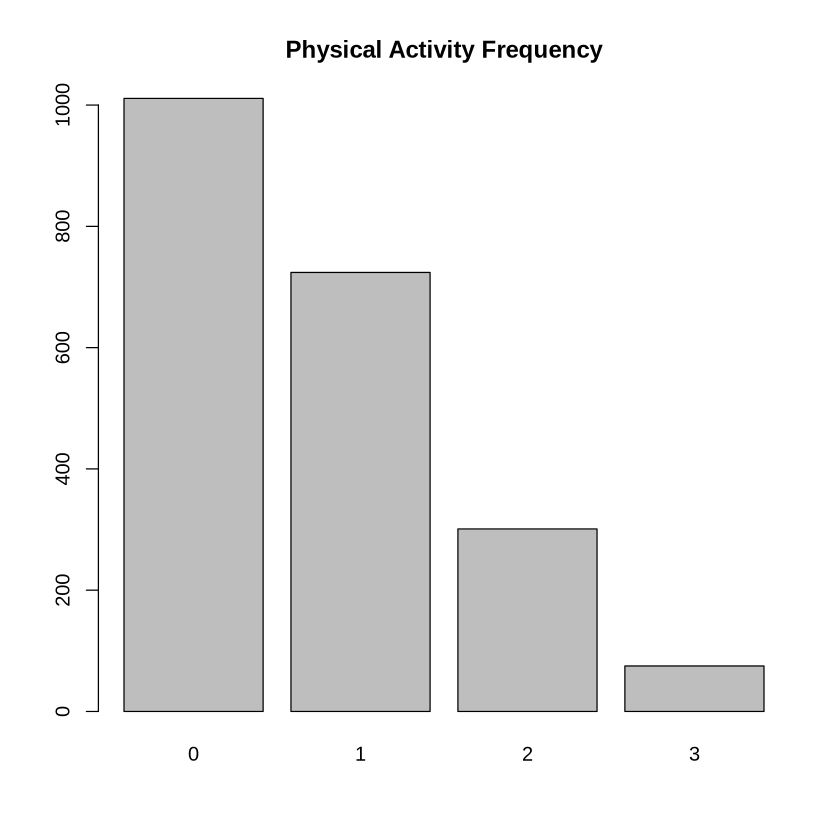

In [123]:
barplot(table(cleaned_df$FAF), main="Physical Activity Frequency")

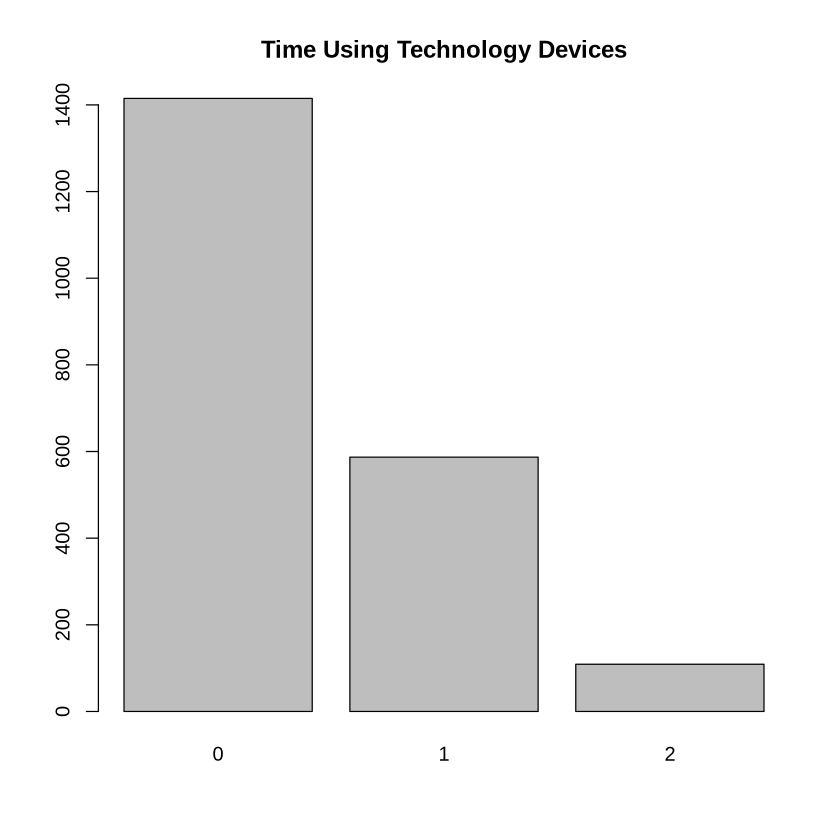

In [128]:
barplot(table(cleaned_df$TUE), main="Time Using Technology Devices")

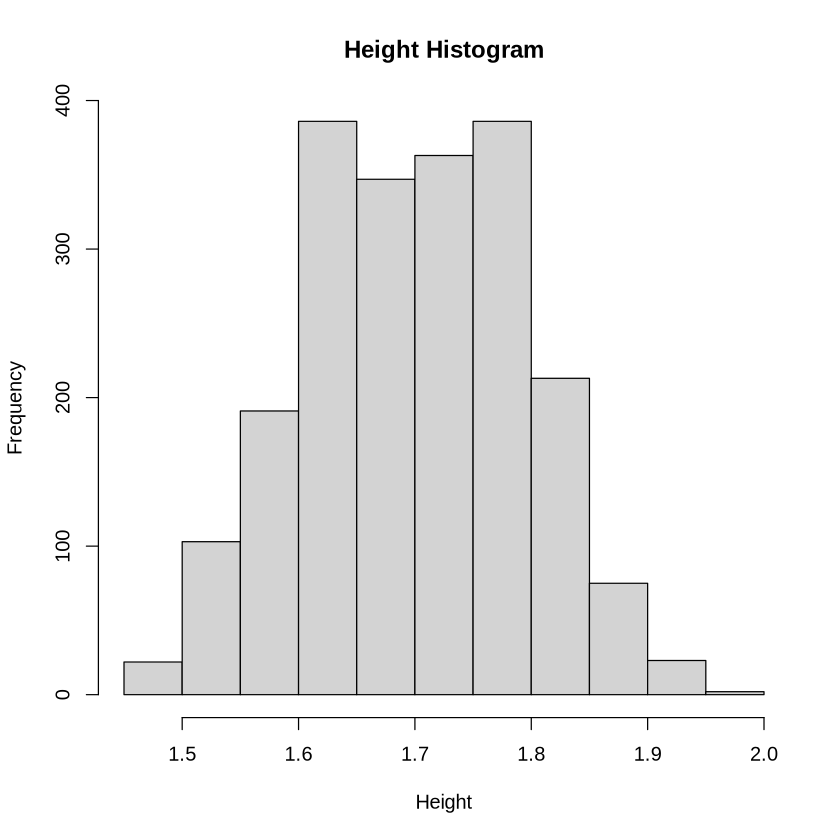

In [134]:
hist(cleaned_df$Height, xlab="Height", main="Height Histogram")

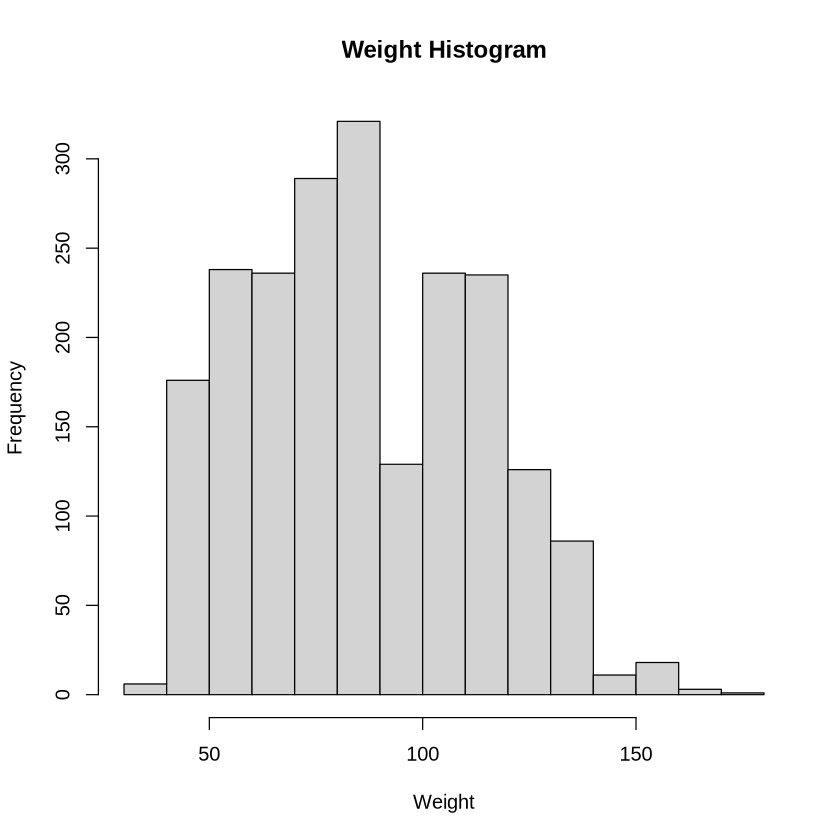

In [135]:
hist(cleaned_df$Weight, xlab="Weight", main="Weight Histogram")


Insufficient_Weight       Normal_Weight      Obesity_Type_I     Obesity_Type_II 
                272                 287                 351                 297 
   Obesity_Type_III  Overweight_Level_I Overweight_Level_II 
                324                 290                 290 


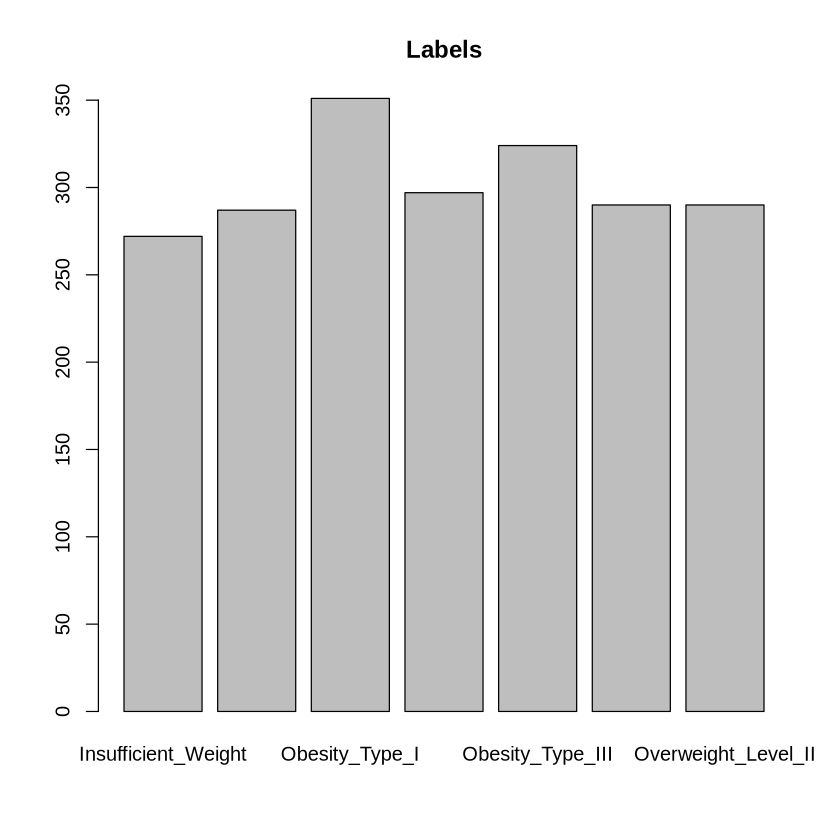

In [164]:
print(table(cleaned_df$NObeyesdad))
barplot(table(cleaned_df$NObeyesdad), main="Labels")


Female   Male 
  1043   1068 


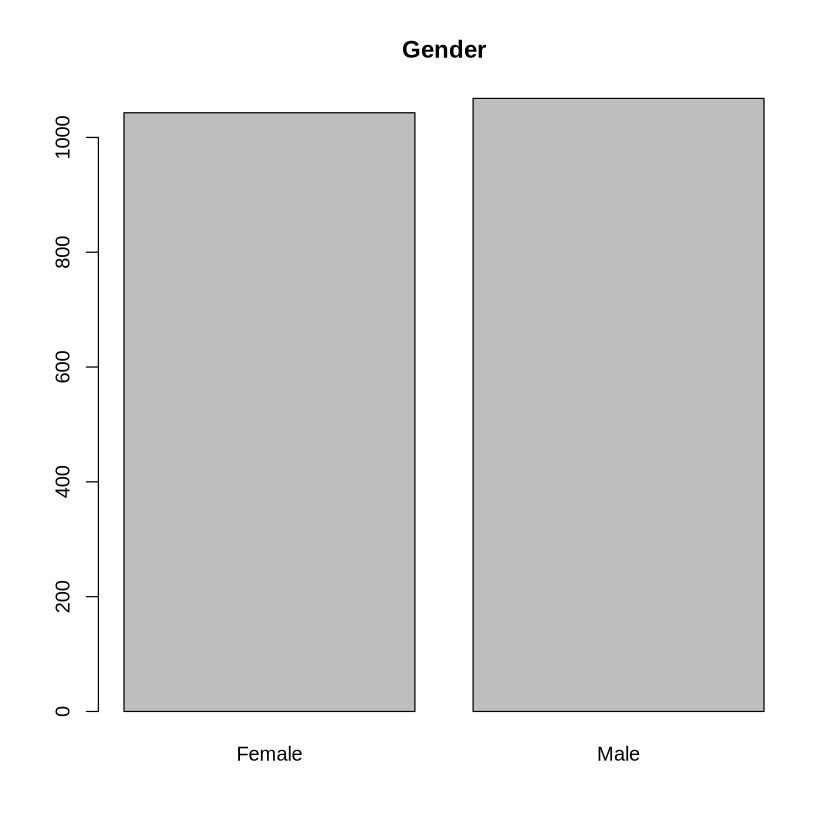

In [106]:
print(table(cleaned_df$Gender))
barplot(table(cleaned_df$Gender), main="Gender")


  no  yes 
 385 1726 


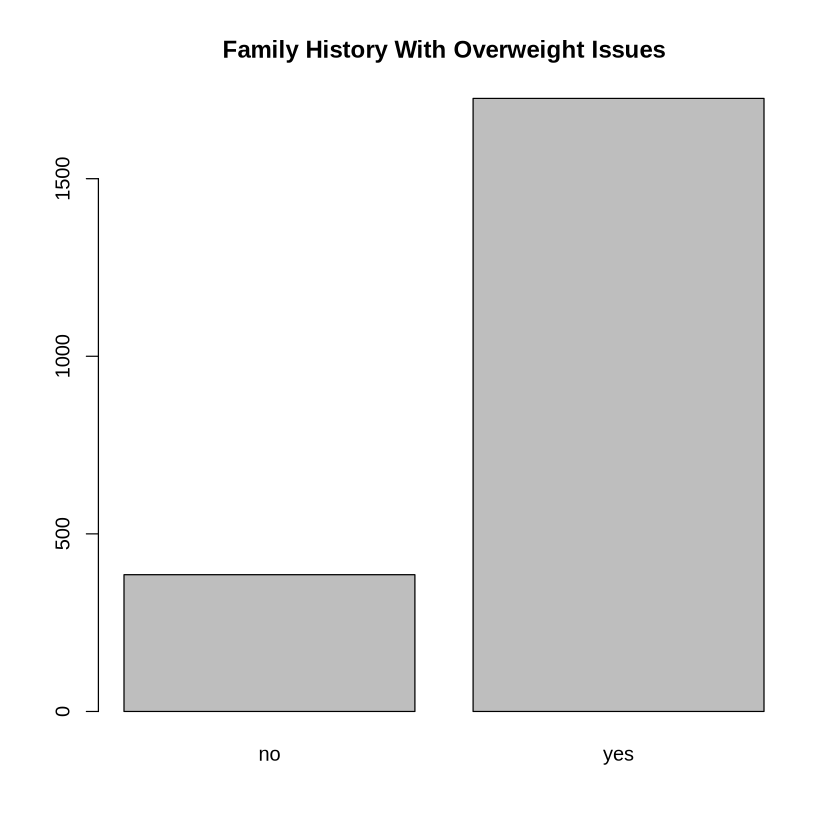

In [107]:
print(table(cleaned_df$family_history_with_overweight))
barplot(table(cleaned_df$family_history_with_overweight), main="Family History With Overweight Issues")


  no  yes 
 245 1866 


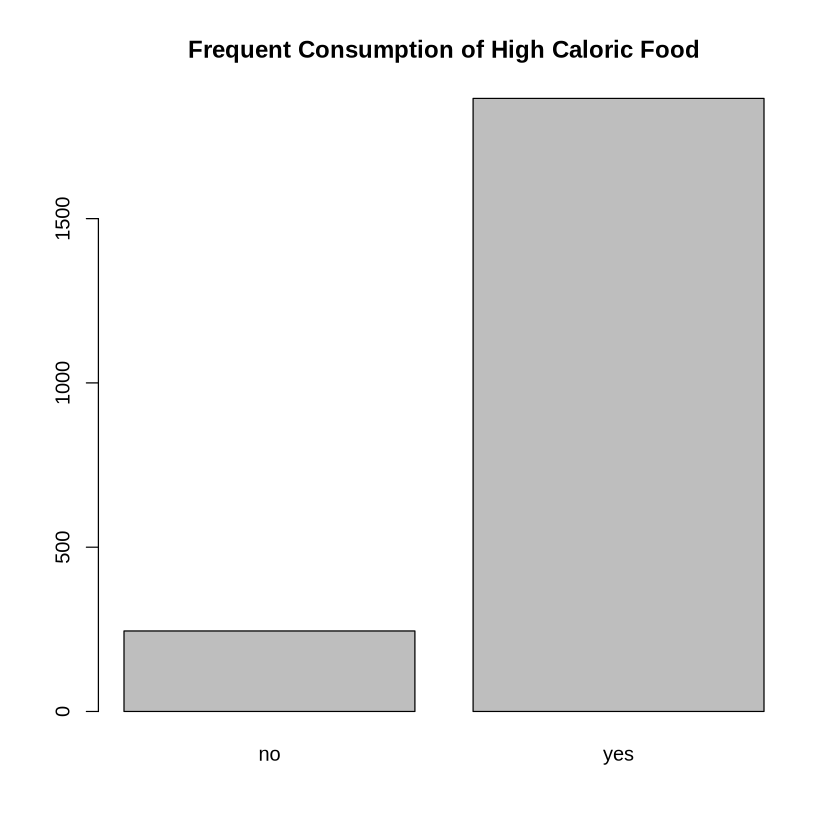

In [108]:
print(table(cleaned_df$FAVC))
barplot(table(cleaned_df$FAVC), main="Frequent Consumption of High Caloric Food")


    Always Frequently         no  Sometimes 
        53        242         51       1765 


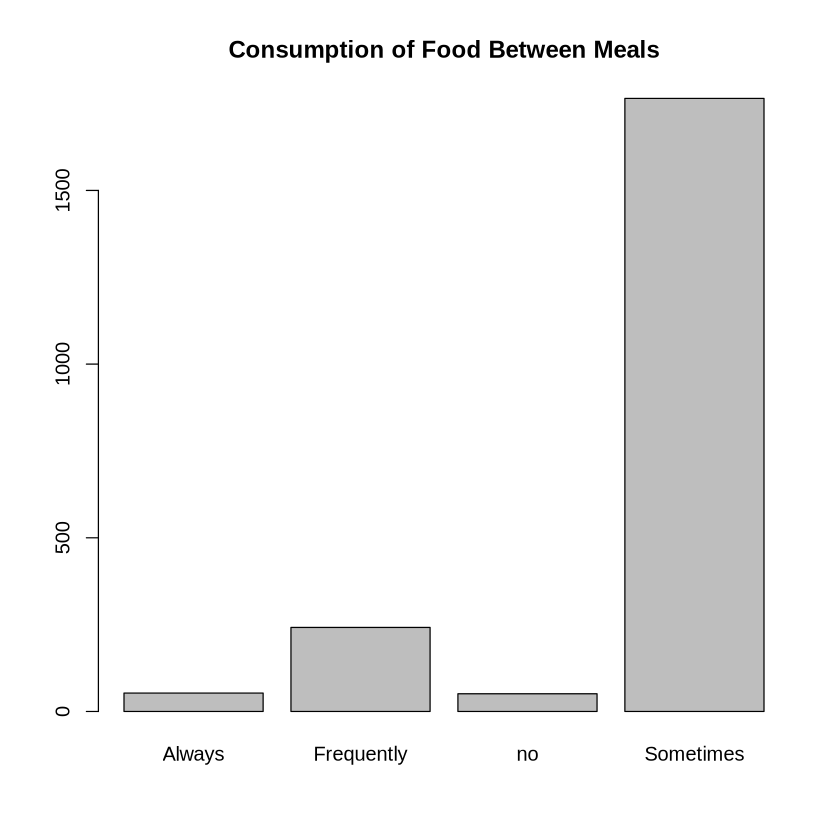

In [109]:
print(table(cleaned_df$CAEC))
barplot(table(cleaned_df$CAEC), main="Consumption of Food Between Meals")


  no  yes 
2067   44 


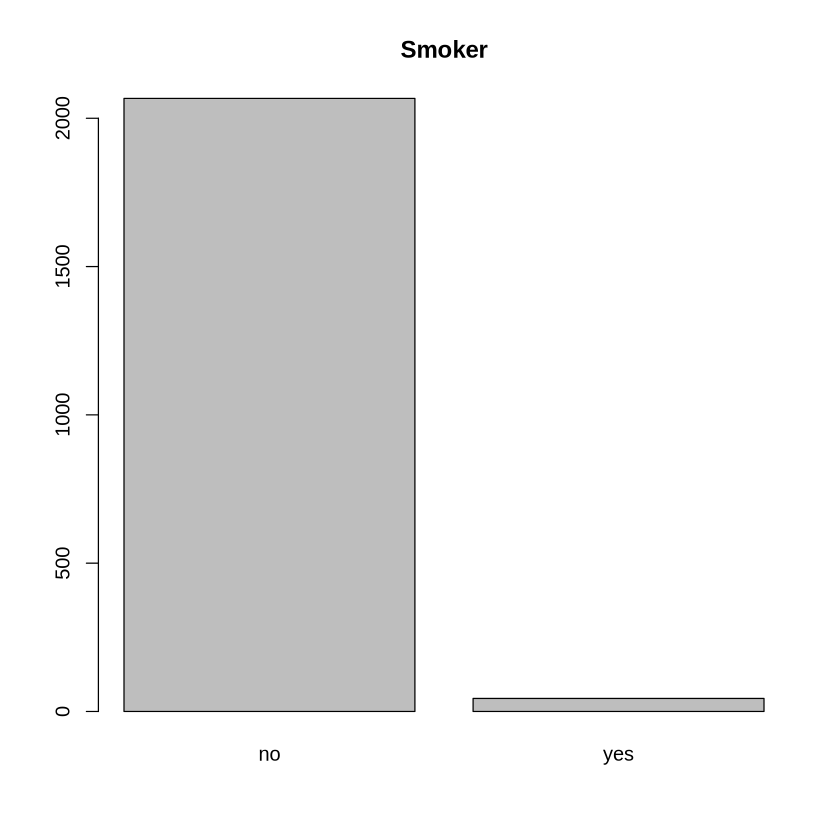

In [110]:
print(table(cleaned_df$SMOKE))
barplot(table(cleaned_df$SMOKE), main="Smoker")


  no  yes 
2015   96 


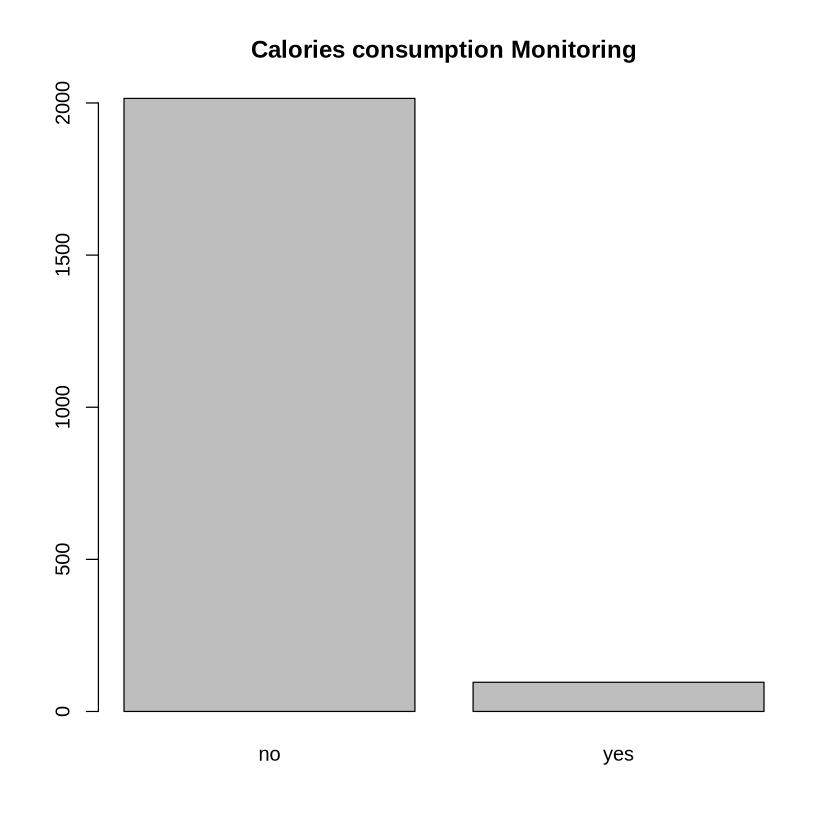

In [111]:
print(table(cleaned_df$SCC))
barplot(table(cleaned_df$SCC), main="Calories consumption Monitoring")


    Always Frequently         no  Sometimes 
         1         70        639       1401 


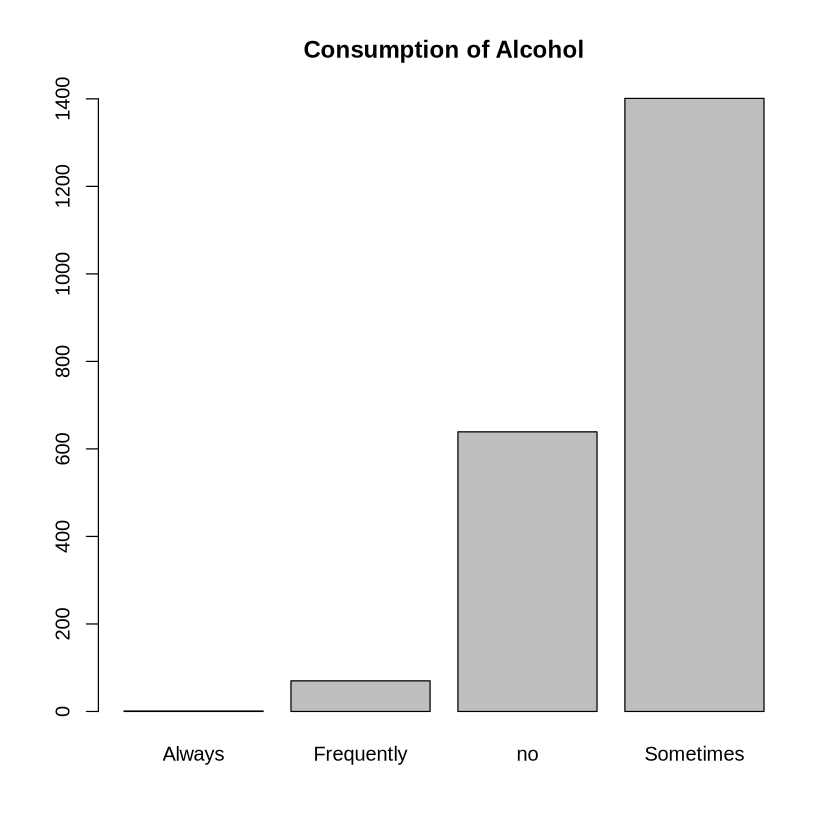

In [112]:
print(table(cleaned_df$CALC))
barplot(table(cleaned_df$CALC), main="Consumption of Alcohol")


           Automobile                  Bike             Motorbike 
                  457                     7                    11 
Public_Transportation               Walking 
                 1580                    56 


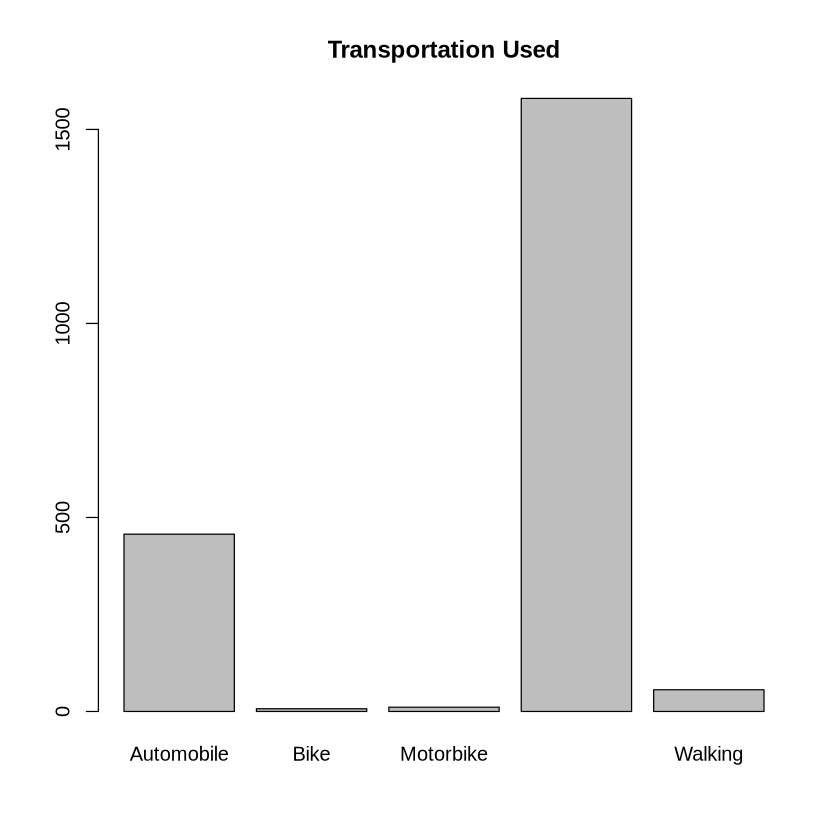

In [113]:
print(table(cleaned_df$MTRANS))
barplot(table(cleaned_df$MTRANS), main="Transportation Used")

## Find Correlations

In [114]:
corrr::correlate(cleaned_df, method = "spearman")

Non-numeric variables removed from input: `Gender`, `family_history_with_overweight`, `FAVC`, `CAEC`, `SMOKE`, `SCC`, `CALC`, `MTRANS`, and `NObeyesdad`
Correlation computed with
• Method: 'spearman'
• Missing treated using: 'pairwise.complete.obs'


term,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age,NA,-0.009824782,0.33883715,0.01332190,-0.08111149,0.008290269,-0.23353787,-0.30615768
Height,-0.009824782,NA,0.46254814,-0.08964151,0.19514325,0.225237195,0.26899771,0.08154810
Weight,0.338837149,0.462548144,NA,0.17134422,0.08011638,0.225592359,-0.13260538,-0.04986969
FCVC,0.013321900,-0.089641508,0.17134422,NA,0.16528981,0.093946370,0.01055125,-0.10419098
NCP,-0.081111491,0.195143250,0.08011638,0.16528981,NA,0.086478765,0.12483916,0.07132037
CH2O,0.008290269,0.225237195,0.22559236,0.09394637,0.08647877,NA,0.16460834,0.02316174
FAF,-0.233537874,0.268997708,-0.13260538,0.01055125,0.12483916,0.164608339,NA,0.02851653
TUE,-0.306157681,0.081548096,-0.04986969,-0.10419098,0.07132037,0.023161744,0.02851653,NA


# Create Model

## Split Dataset

In [160]:
trainIndex <- caret::createDataPartition(cleaned_df$NObeyesdad, p = .8, list = FALSE)
trainDataset <- df[trainIndex, ]
testDataset <- df[-trainIndex, ]

print(paste("train dataset rows: ", nrow(trainDataset)))
print(paste("test dataset rows: ", nrow(testDataset)))

[1] "train dataset rows:  1691"
[1] "test dataset rows:  420"


## Create And Save Model

In [188]:
control <- caret::trainControl(method = "cv", number = 5)

set.seed(42)
rfModel <- caret::train(NObeyesdad ~ ., data = trainDataset, method = "rf", trControl = control, metric = "Accuracy")

saveRDS(rfModel, "fine_tuned_rf_model.rds")

summary(rfModel)

                Length Class      Mode     
call                4  -none-     call     
type                1  -none-     character
predicted        1691  factor     numeric  
err.rate         4000  -none-     numeric  
confusion          56  -none-     numeric  
votes           11837  matrix     numeric  
oob.times        1691  -none-     numeric  
classes             7  -none-     character
importance         23  -none-     numeric  
importanceSD        0  -none-     NULL     
localImportance     0  -none-     NULL     
proximity           0  -none-     NULL     
ntree               1  -none-     numeric  
mtry                1  -none-     numeric  
forest             14  -none-     list     
y                1691  factor     numeric  
test                0  -none-     NULL     
inbag               0  -none-     NULL     
xNames             23  -none-     character
problemType         1  -none-     character
tuneValue           1  data.frame list     
obsLevels           7  -none-   

In [189]:
rfModel

Random Forest 

1691 samples
  16 predictor
   7 classes: 'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1352, 1354, 1352, 1353, 1353 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8834961  0.8639035
  12    0.9621772  0.9558239
  23    0.9532962  0.9454451

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 12.

## Load Model (Optional)

In [221]:
rfModel <- readRDS("fine_tuned_rf_model.rds")
rfModel

Random Forest 

1691 samples
  16 predictor
   7 classes: 'Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 1352, 1354, 1352, 1353, 1353 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8834961  0.8639035
  12    0.9621772  0.9558239
  23    0.9532962  0.9454451

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 12.

In [288]:
rfModel$finalModel


Call:
 randomForest(x = x, y = y, mtry = param$mtry) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 12

        OOB estimate of  error rate: 4.14%
Confusion matrix:
                    Insufficient_Weight Normal_Weight Obesity_Type_I
Insufficient_Weight                 209             9              0
Normal_Weight                         4           217              0
Obesity_Type_I                        0             0            272
Obesity_Type_II                       0             0              4
Obesity_Type_III                      0             0              0
Overweight_Level_I                    0            21              0
Overweight_Level_II                   0             2              4
                    Obesity_Type_II Obesity_Type_III Overweight_Level_I
Insufficient_Weight               0                0                  0
Normal_Weight                     0                

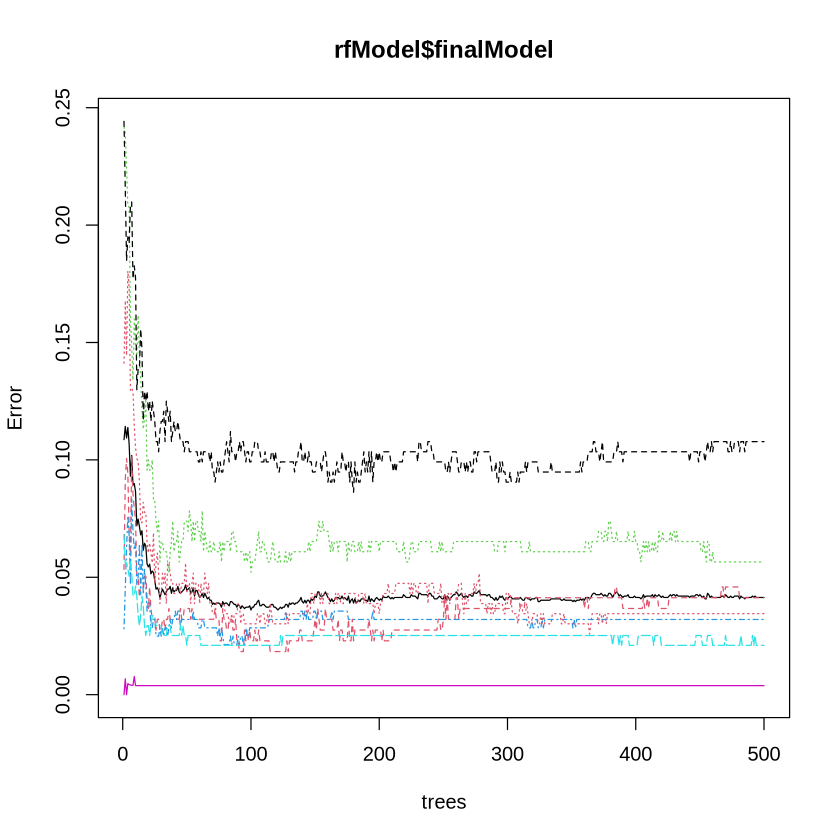

In [277]:
plot(rfModel$finalModel)

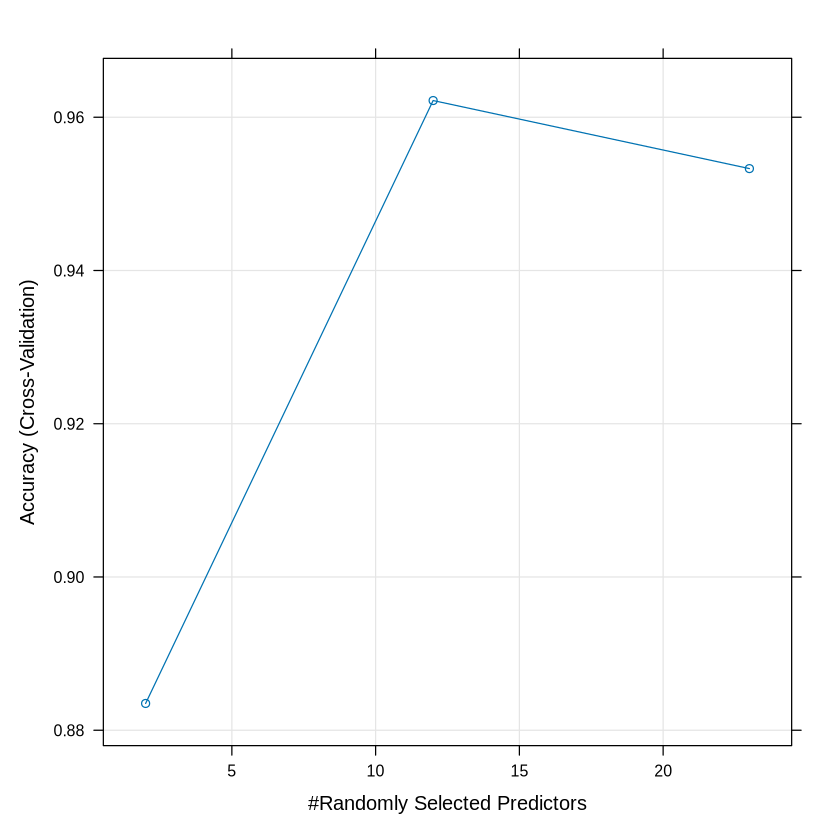

In [229]:
plot(rfModel)

In [283]:
getTree(rfModel$finalModel, k=2, labelVar = TRUE)

,left daughter,right daughter,split var,split point,status,prediction
,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<chr>
1,2,3,FCVC,2.998976,1,NA
2,4,5,Weight,109.585179,1,NA
3,6,7,CAECSometimes,0.500000,1,NA
4,8,9,family_history_with_overweightyes,0.500000,1,NA
5,10,11,NCP,2.466282,1,NA
6,12,13,Weight,54.917788,1,NA
7,14,15,Weight,101.250000,1,NA
8,16,17,FCVC,2.007629,1,NA
9,18,19,NCP,3.018895,1,NA


# Compare to Test Dataset

In [297]:
?confusionMatrix

confusionMatrix {ModelMetrics},R Documentation
actual,A vector of the labels
predicted,A vector of predicted values
cutoff,A cutoff for the predicted values


In [307]:
pred <- predict(rfModel, testDataset)
actual <- factor(testDataset$NObeyesdad)
levels(actual) <- levels(pred)
confusionMatrix(actual, pred)

Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Obesity_Type_I
  Insufficient_Weight                  52             2              0
  Normal_Weight                         0            56              0
  Obesity_Type_I                        0             0             68
  Obesity_Type_II                       0             0              0
  Obesity_Type_III                      0             0              0
  Overweight_Level_I                    0             2              0
  Overweight_Level_II                   0             2              1
                     Reference
Prediction            Obesity_Type_II Obesity_Type_III Overweight_Level_I
  Insufficient_Weight               0                0                  0
  Normal_Weight                     0                0                  1
  Obesity_Type_I                    0                0                  0
  Obesity_Type_II                  59    